In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
nf=pd.read_csv('/content/netflix_titles.csv')

In [ ]:
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Checking NaN values

In [ ]:
nf.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data cleaning¶
Removing nan values from dataset to make it more efficient

In [ ]:
nf=nf.dropna()

In [ ]:
nf.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#dropping waste columns
del nf['show_id']

# Checking datatypes

In [ ]:
nf.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#Changing object data type to respective data type

In [ ]:
nf['type']=nf['type'].astype('category')
nf['title']=nf['title'].astype('category')
nf['director']=nf['director'].astype('category')
nf['country']=nf['country'].astype('category')
nf['cast']=nf['cast'].astype('category')
nf['release_year']=nf['release_year'].astype(int)
nf['date_added']=pd.to_datetime(nf['date_added'])
nf['rating']=nf['rating'].astype('category')

<ipython-input-30-6611fa1460d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf['type']=nf['type'].astype('category')
<ipython-input-30-6611fa1460d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf['title']=nf['title'].astype('category')
<ipython-input-30-6611fa1460d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
nf.dtypes

type                  category
title                 category
director              category
cast                  category
country               category
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in               object
description             object
dtype: object

# Checking duplicates

In [ ]:
nf[nf.duplicated()]
# There are no duplicated values

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# Describing the data set

In [ ]:
nf.describe()

<ipython-input-12-7f2291cb44d7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nf.describe()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5332,5332,5332,5332,5332,5332,5332,5332,5332,5332,5332
unique,2,5332,3945,5200,604,1450,72,14,198,335,5321
top,Movie,#Alive,"Raúl Campos, Jan Suter",Samuel West,United States,2020-01-01 00:00:00,1970-01-01 00:00:00.000002017,TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...
freq,5185,1,18,10,1846,92,657,1822,135,336,2
first,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1970-01-01 00:00:00.000001942,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,1970-01-01 00:00:00.000002021,NaN,NaN,NaN,NaN


# Count of movies and Tv shows in dataset

In [ ]:
nf['type'].value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

**Plotting**

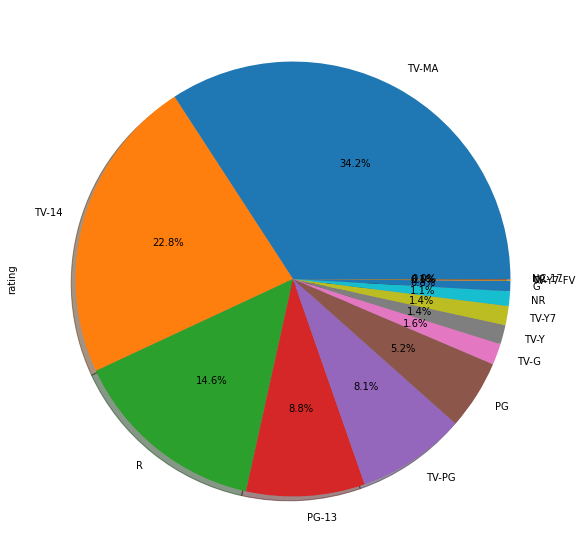

In [ ]:
nf['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,10))

**Rating count**

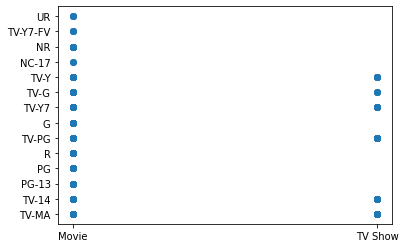

In [ ]:
plt.scatter(x=nf['type'],y=nf['rating'])

In [ ]:
nf.groupby(['type','rating']).sum()

<ipython-input-17-715a3adbcbd6>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  nf.groupby(['type','rating']).sum()


duration  \
type    rating                                                        
Movie   G         90 min93 min173 min87 min78 min83 min79 min81 ...   
        NC-17                                        112 min180 min   
        NR        90 min86 min44 min112 min86 min86 min133 min95...   
        PG        124 min116 min98 min90 min119 min95 min95 min1...   
        PG-13     104 min103 min97 min106 min96 min91 min108 min...   
        R         115 min122 min106 min118 min117 min121 min113 ...   
        TV-14     166 min99 min99 min102 min85 min128 min143 min...   
        TV-G      92 min95 min15 min60 min92 min58 min105 min102...   
        TV-MA     125 min127 min182 min147 min95 min97 min100 mi...   
        TV-PG     88 min100 min93 min96 min95 min97 min95 min83 ...   
        TV-Y      60 min94 min73 min22 min65 min91 min46 min28 m...   
        TV-Y7     64 min68 min90 min93 min105 min88 min87 min85 ...   
        TV-Y7-FV                                43 min78 min109 min   
        UR                                    103 min103 min113 min   
TV Show G                                                         0   
        NC-17                                                     0   
        NR                                                        0   
        PG                                                        0   
        PG-13                                                     0   
        R                                                         0   
        TV-14     9 Seasons1 Season7 Seasons4 Seasons1 Season6 S...   
        TV-G                               1 Season1 Season1 Season   
        TV-MA     1 Season1 Season2 Seasons1 Season2 Seasons1 Se...   
        TV-PG     1 Season1 Season1 Season1 Season1 Season1 Seas...   
        TV-Y              1 Season2 Seasons1 Season1 Season1 Season   
        TV-Y7     5 Seasons1 Season2 Seasons2 Seasons1 Season1 S...   
        TV-Y7-FV                                                  0   
        UR                                                        0   

                                                          listed_in  \
type    rating                                                        
Movie   G         Children & Family Movies, DramasChildren & Fam...   
        NC-17     Comedies, International MoviesDramas, Independ...   
        NR        Horror Movies, Independent Movies, ThrillersCo...   
        PG        Action & Adventure, Classic Movies, DramasDram...   
        PG-13     Comedies, DramasComediesHorror Movies, Sci-Fi ...   
        R         Action & AdventureDramas, ThrillersAction & Ad...   
        TV-14     Comedies, International Movies, Romantic Movie...   
        TV-G      International Movies, Romantic MoviesDramas, I...   
        TV-MA     Dramas, Independent Movies, International Movi...   
        TV-PG     Action & Adventure, Anime Features, Internatio...   
        TV-Y      Children & Family MoviesChildren & Family Movi...   
        TV-Y7     Children & Family MoviesChildren & Family Movi...   
        TV-Y7-FV  Children & Family Movies, ComediesChildren & F...   
        UR        Dramas, International Movies, Romantic MoviesD...   
TV Show G                                                         0   
        NC-17                                                     0   
        NR                                                        0   
        PG                                                        0   
        PG-13                                                     0   
        R                                                         0   
        TV-14     British TV Shows, Reality TVInternational TV S...   
        TV-G      Reality TVKids' TV, TV ComediesBritish TV Show...   
        TV-MA     Crime TV Shows, International TV Shows, TV Dra...   
        TV-PG     Anime Series, Romantic TV Shows, Teen TV Shows...   
        TV-Y      Kids' TVBritish TV Shows, Classic & Cult TV, K...   
        TV-

In [ ]:
# top 5 countries and movies released
country=nf['country'].value_counts().head(5)
country

United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Name: country, dtype: int64

<BarContainer object of 5 artists>

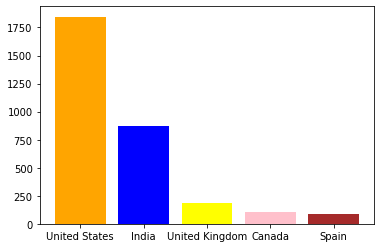

In [ ]:
plt.bar(x=country.index,height=country,color=['orange','blue','yellow','pink','brown'])

In [ ]:
# top 10 movies
movie=nf.loc[nf['type']=='Movie']
movie=movie.groupby('title').max().head(10)
movie

<ipython-input-20-3f5de450ca7e>:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  movie=movie.groupby('title').max().head(10)


,date_added,release_year,duration,listed_in,description
title,,,,,
#Alive,2020-09-08,1970-01-01 00:00:00.000002020,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
#AnneFrank - Parallel Stories,2020-07-01,1970-01-01 00:00:00.000002019,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol..."
#FriendButMarried,2020-05-21,1970-01-01 00:00:00.000002018,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ..."
#FriendButMarried 2,2020-06-28,1970-01-01 00:00:00.000002020,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...
#Roxy,2019-04-10,1970-01-01 00:00:00.000002018,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
#Selfie,2021-06-21,1970-01-01 00:00:00.000002014,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ..."
#Selfie 69,2021-06-21,1970-01-01 00:00:00.000002016,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin..."
#realityhigh,2017-09-08,1970-01-01 00:00:00.000002017,99 min,Comedies,When nerdy high schooler Dani finally attracts...
'76,2021-08-04,1970-01-01 00:00:00.000002016,118 min,"Dramas, International Movies",When her husband is accused of taking part in ...


In [ ]:
# non popular tv shows
movie1=nf.loc[nf['type']=='TV Show']
movie1=movie1.groupby('title').max().tail()
movie1

<ipython-input-21-ae0171dd5af0>:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  movie1=movie1.groupby('title').max().tail()


,date_added,release_year,duration,listed_in,description
title,,,,,
​Goli Soda 2,NaT,NaT,None,None,None
​Maj Rati ​​Keteki,NaT,NaT,None,None,None
​Mayurakshi,NaT,NaT,None,None,None
​​Kuch Bheege Alfaaz,NaT,NaT,None,None,None
반드시 잡는다,NaT,NaT,None,None,None


In [ ]:
#top directors
x=nf['director'].value_counts().head(10).index
y=nf['director'].value_counts().head(10)
print(y)

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: director, dtype: int64


<BarContainer object of 10 artists>

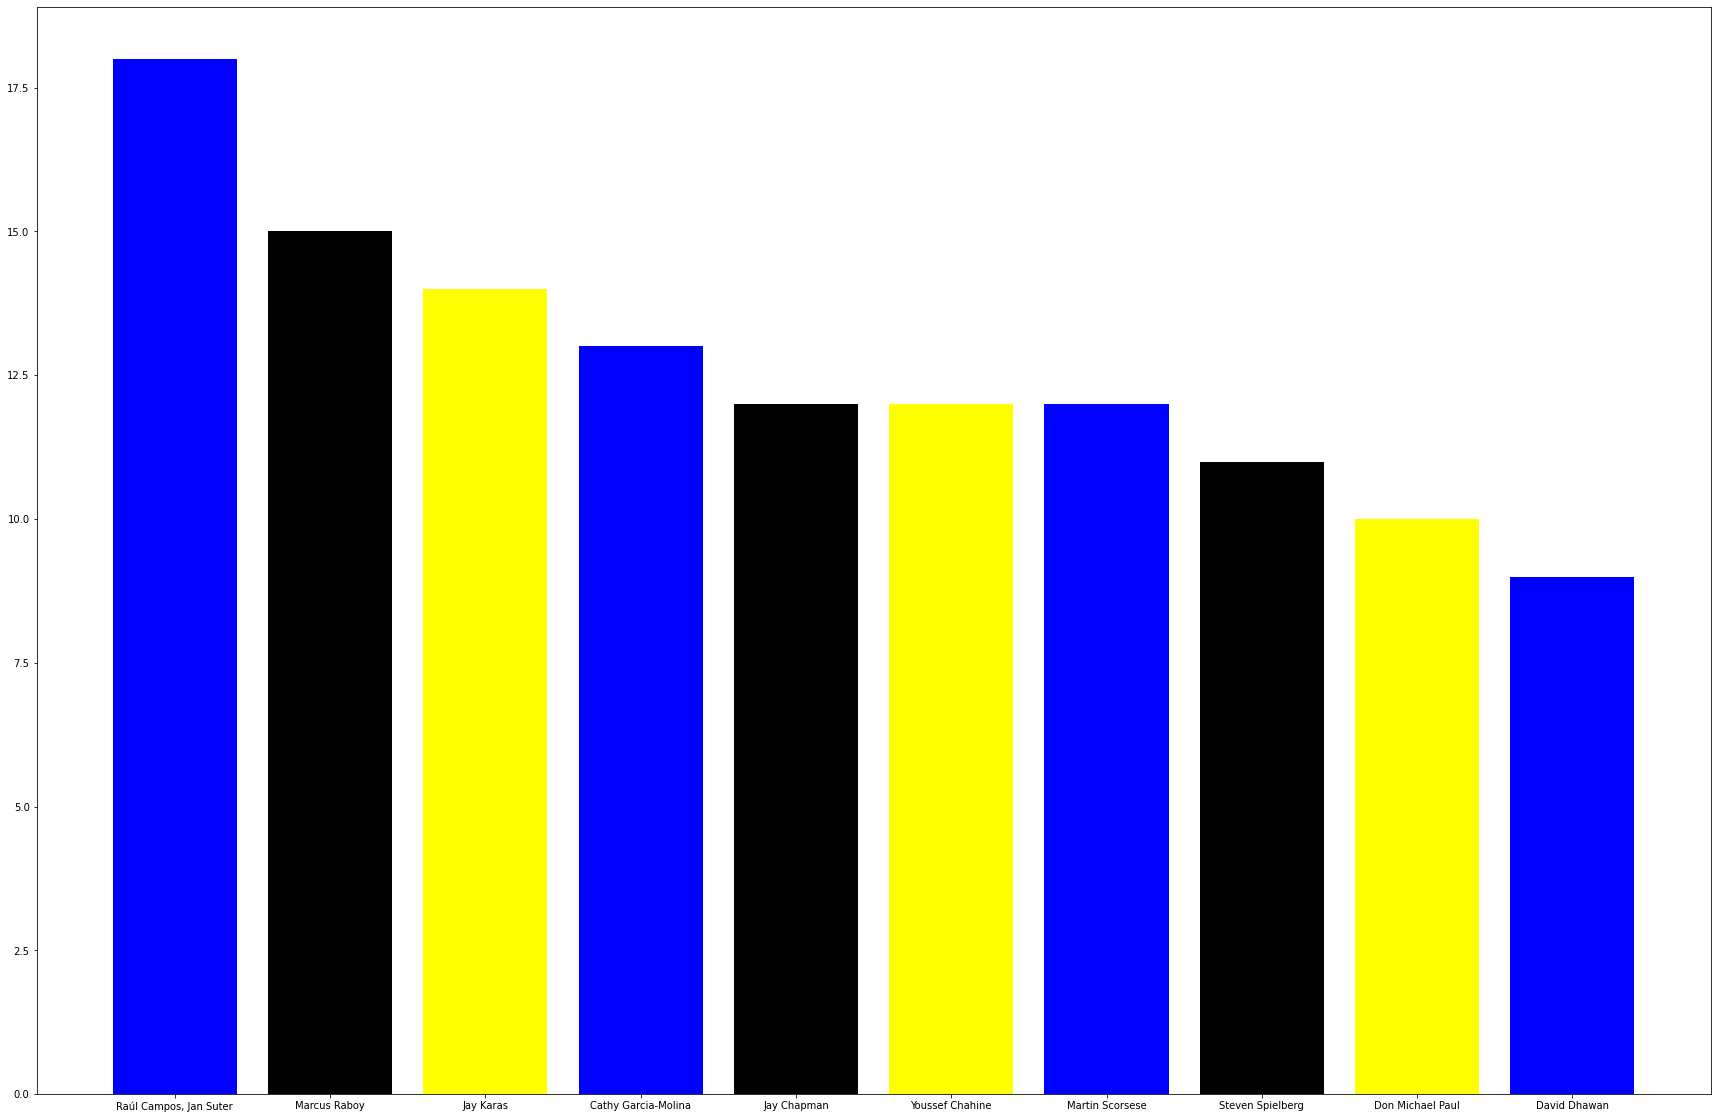

In [ ]:
fig=plt.figure(figsize=(30,20))
plt.bar(x=x,height=y,color=['blue','black','yellow'])

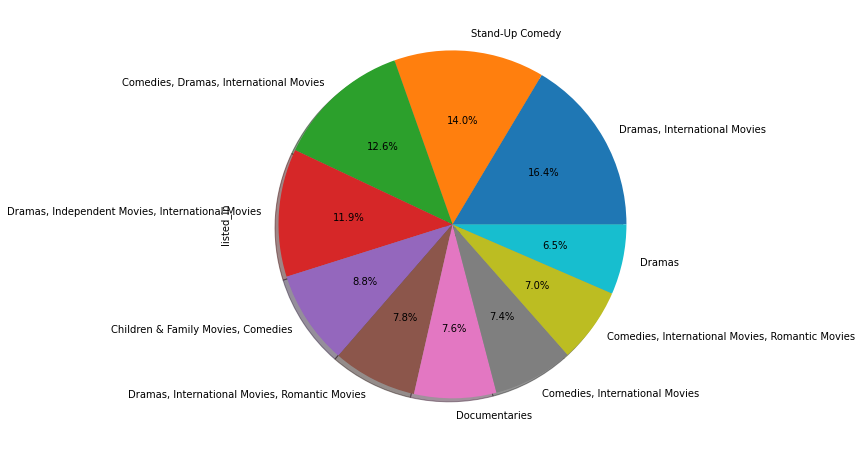

In [ ]:
nf['listed_in'].value_counts().head(10).plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [ ]:
#max duraytion movie
nf22=nf[(nf['duration']=='203 min')]
nf22

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2126,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,2020-08-15,1970-01-01 00:00:00.000002009,TV-PG,203 min,"Comedies, International Movies, Music & Musicals","To protect his family from ruin, Yogesh must m..."


In [ ]:
#min duration movie
nf[(nf['duration']=='94 min')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
145,Movie,House Party 2,"George Jackson, Doug McHenry","Christopher Reid, Christopher Martin, Martin L...",United States,2021-09-01,1970-01-01 00:00:00.000001991,R,94 min,"Comedies, Cult Movies, Music & Musicals",Kid goes off to college with scholarship money...
146,Movie,House Party 3,Eric Meza,"Christopher Reid, Christopher Martin, Tisha Ca...",United States,2021-09-01,1970-01-01 00:00:00.000001994,R,94 min,"Comedies, Music & Musicals","After Kid gets engaged, Play plans to throw th..."
176,Movie,The Golden Child,Michael Ritchie,"Eddie Murphy, J.L. Reate, Charles Dance, Charl...",United States,2021-09-01,1970-01-01 00:00:00.000001986,PG-13,94 min,"Action & Adventure, Comedies",A fast-talking L.A. social worker goes through...
264,Movie,Walk of Shame,Steve Brill,"Elizabeth Banks, James Marsden, Gillian Jacobs...",United States,2021-08-16,1970-01-01 00:00:00.000002014,R,94 min,"Comedies, Independent Movies","After a night of boozy carousing, a local news..."
374,Movie,Flower Girl,Michelle Bello,"Damilola Adegbite, Chris Attoh, Chuks Chukwuje...",Nigeria,2021-07-29,1970-01-01 00:00:00.000002013,TV-PG,94 min,"Comedies, International Movies, Romantic Movies",When a young florist who's long dreamed of her...
...,...,...,...,...,...,...,...,...,...,...,...
8688,Movie,Waiting,Anu Menon,"Naseeruddin Shah, Kalki Koechlin, Rajat Kapoor...",India,2018-05-01,1970-01-01 00:00:00.000002015,TV-MA,94 min,"Dramas, International Movies",While visiting his comatose wife in the hospit...
8689,Movie,Waiting...,Rob McKittrick,"Ryan Reynolds, Anna Faris, Justin Long, David ...",United States,2020-09-23,1970-01-01 00:00:00.000002005,R,94 min,"Comedies, Independent Movies",Employees turn up the antics during an eight-h...
8692,Movie,Walk with Me,"Marc Francis, Max Pugh","Benedict Cumberbatch, Thich Nhat Hanh",United Kingdom,2017-12-26,1970-01-01 00:00:00.000002017,TV-PG,94 min,Documentaries,A community of monks in France led by Zen Budd...
8708,Movie,We're No Animals,Alejandro Agresti,"John Cusack, Paul Hipp, Kevin Morris, Alejandr...","United States, Argentina",2017-08-15,1970-01-01 00:00:00.000002015,TV-MA,94 min,"Comedies, Dramas, Independent Movies","Unhappy with his commercial film work, a jaded..."
